In [ ]:
"""
import os
import json

for hyp in os.listdir("../../data/sgdm_wbn/noreg"):
    p = f"../../data/sgdm_wbn/noreg/{hyp}"
    with open(f"{p}/settings.json","r") as f:
        js = json.load(f)
    js["save_args"]["save_states_every"] = 100000
    js["save_args"]["save_grad_every"] = -1
    js["num_steps"] = 100000
    js["norm"] = {"change_scale": "identity", "norm_fn": "global_center_std_uncenter", "norm_multiply": 1, "norm_every": 1, "reverse_norms": False}
    new_p = f"../../data/sgdm_wbn/gcstdu_p1/{hyp}"
    os.makedirs(new_p,exist_ok=True)
    with open(f"{new_p}/settings.json","w") as f:
        json.dump(js,f,indent=4)

    print(f"python code/main.py ./data/sgdm_wbn/gcstdu_p1/{hyp}/ --reset")
"""

python code/main.py ./data/sgdm_wbn/gcstdu_p1/0.025/ --reset
python code/main.py ./data/sgdm_wbn/gcstdu_p1/0.005/ --reset
python code/main.py ./data/sgdm_wbn/gcstdu_p1/0.011/ --reset
python code/main.py ./data/sgdm_wbn/gcstdu_p1/0.044/ --reset
python code/main.py ./data/sgdm_wbn/gcstdu_p1/0.006/ --reset
python code/main.py ./data/sgdm_wbn/gcstdu_p1/0.016/ --reset
python code/main.py ./data/sgdm_wbn/gcstdu_p1/0.099/ --reset
python code/main.py ./data/sgdm_wbn/gcstdu_p1/0.008/ --reset


In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("/home/miri/Documents/bachelorthesis/plots")
from plot_utils import *

data_path = "../../data/sgdm_wbn"
image_path = "./images"

2025-03-06 20:51:16.865701: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-06 20:51:16.876499: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-06 20:51:16.879372: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


2025-03-06 20:51:17.421347: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Max test accuracy of Standard is 85.91% with lr 0.025
Max test accuracy of Norm_p1 is 85.78% with p 0.025
Max test accuracy of GCStdU_p1 is 85.53% with p 0.025
Max test accuracy of Norm is 86.08% with p 0.15000000000000002
Max test accuracy of GCStdU is 86.15% with p 0.15000000000000002
Max test accuracy of wd is 82.83% with lambda 0.0020000000000000005


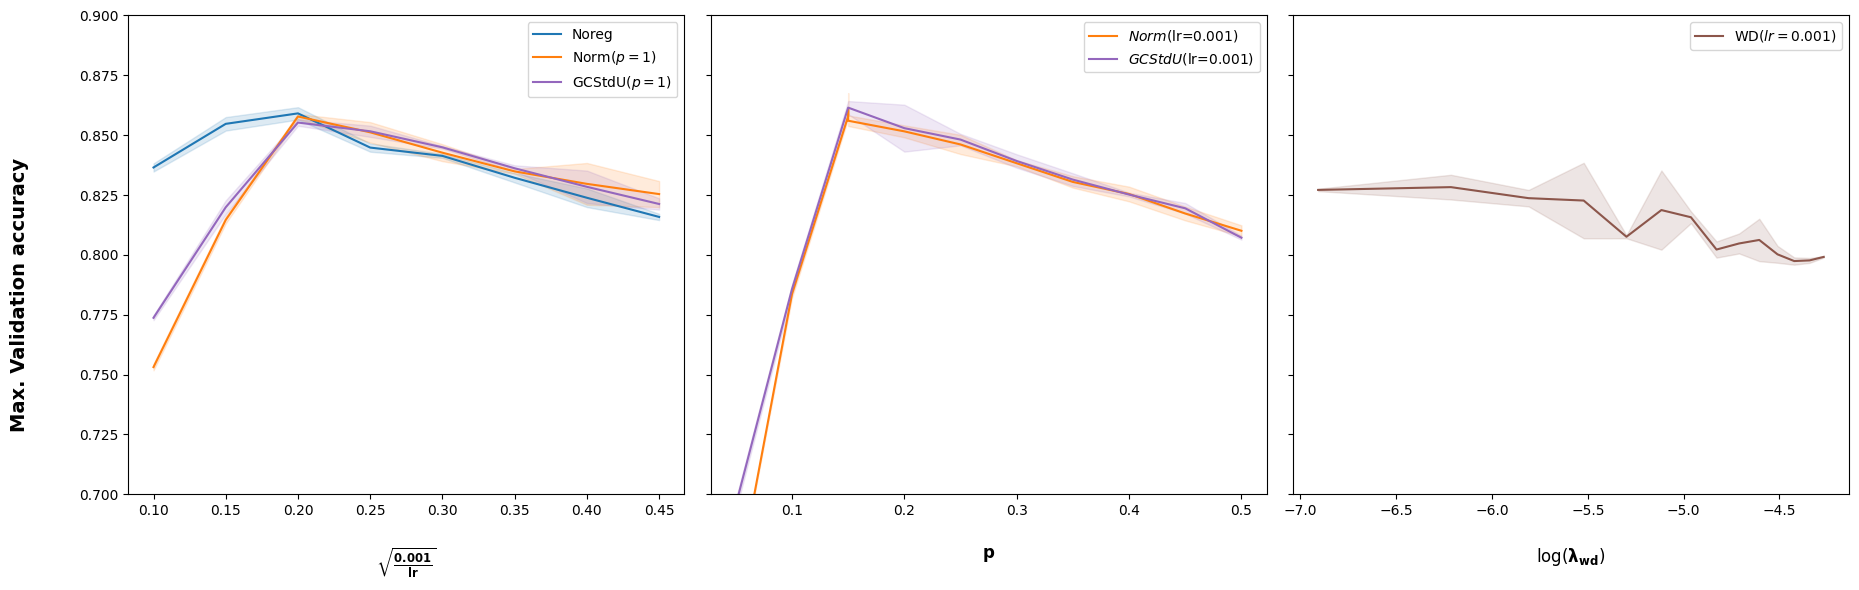

In [4]:
plot_wbn_setting_hyperparam_max_acc(data_path,image_path,["Norm_p1","GCStdU_p1"],["Norm","GCStdU"])

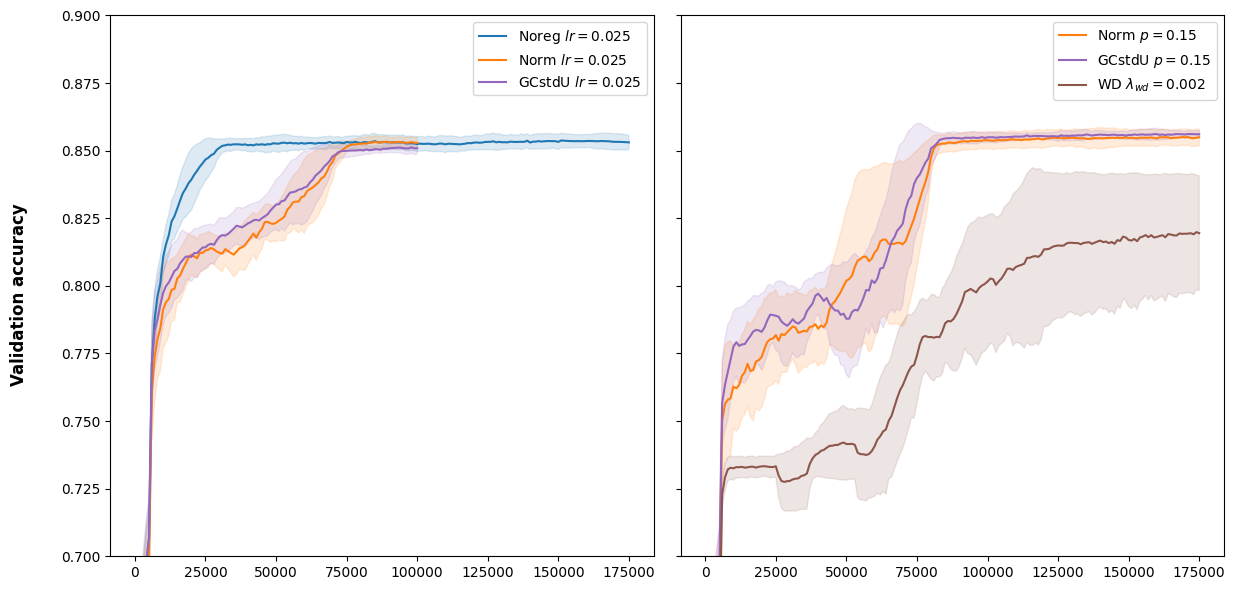

In [77]:
plot_wbn_best_hyperparameter_validation_curve(data_path,image_path,
                                              ["noreg/0.025","norm_p1/0.025","gcstdu_p1/0.025","norm/0.15_1","gcstdu/0.15_1","wd/0.002"],
                                              [r"Noreg $lr = 0.025$", r"Norm $lr=0.025$",r"GCstdU $lr=0.025$", r"Norm $p=0.15$",r"GCstdU $p=0.15$",r"WD $\lambda_{wd}=0.002$"],
                                              ["noreg","norm","gcstdu","norm","gcstdu","wd"],
                                              3)

/home/miri/Documents/bachelorthesis/plots/plot_utils.py:486: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot({"x" : labels,"y" : mean},x = "x", y = "y",palette=colors,edgecolor="black",ax=axs[2])
/home/miri/Documents/bachelorthesis/plots/plot_utils.py:487: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[2].set_xticklabels(axs[2].get_xticklabels(),rotation=70)


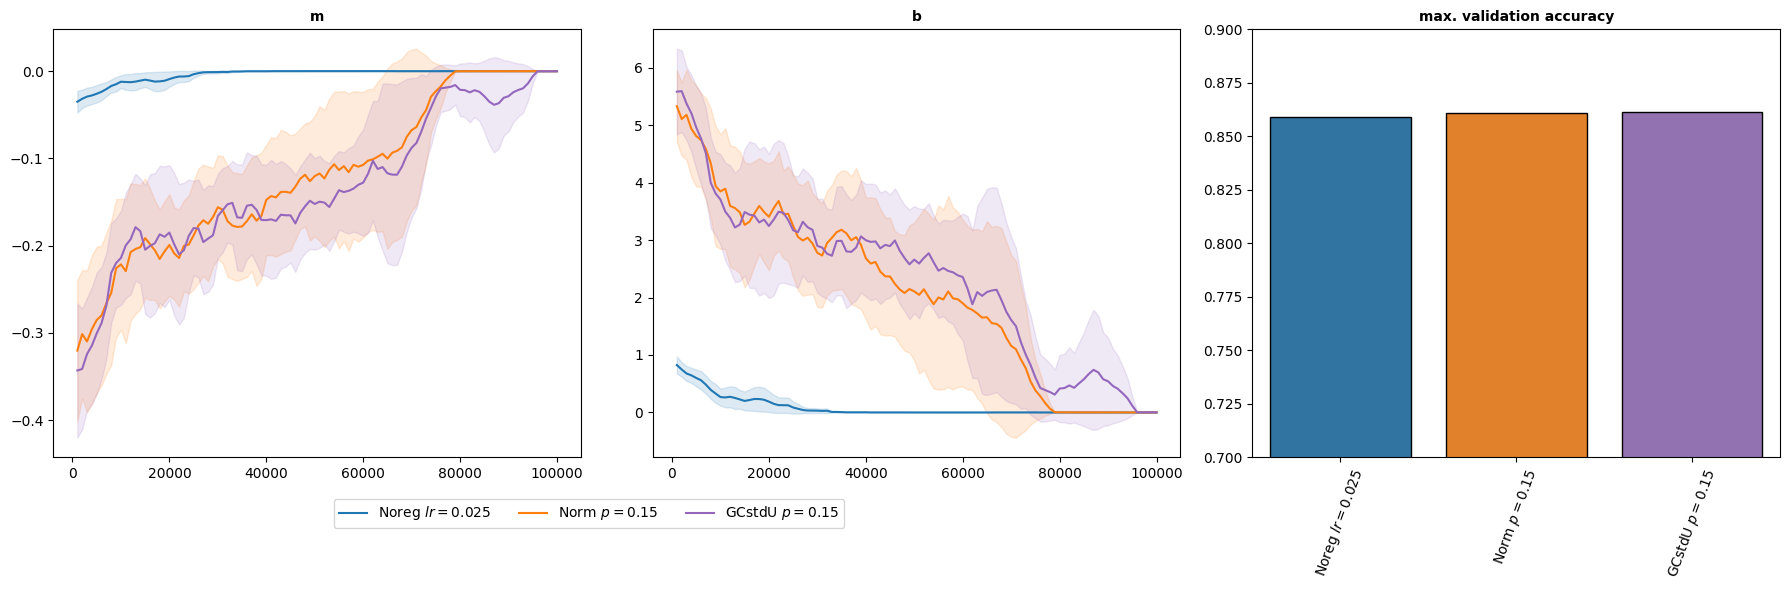

In [6]:
fig,axs = mg_spacing_and_bar_plot(data_path,exps[:-1],labels[:-1],colors,"mg_spacing_0")

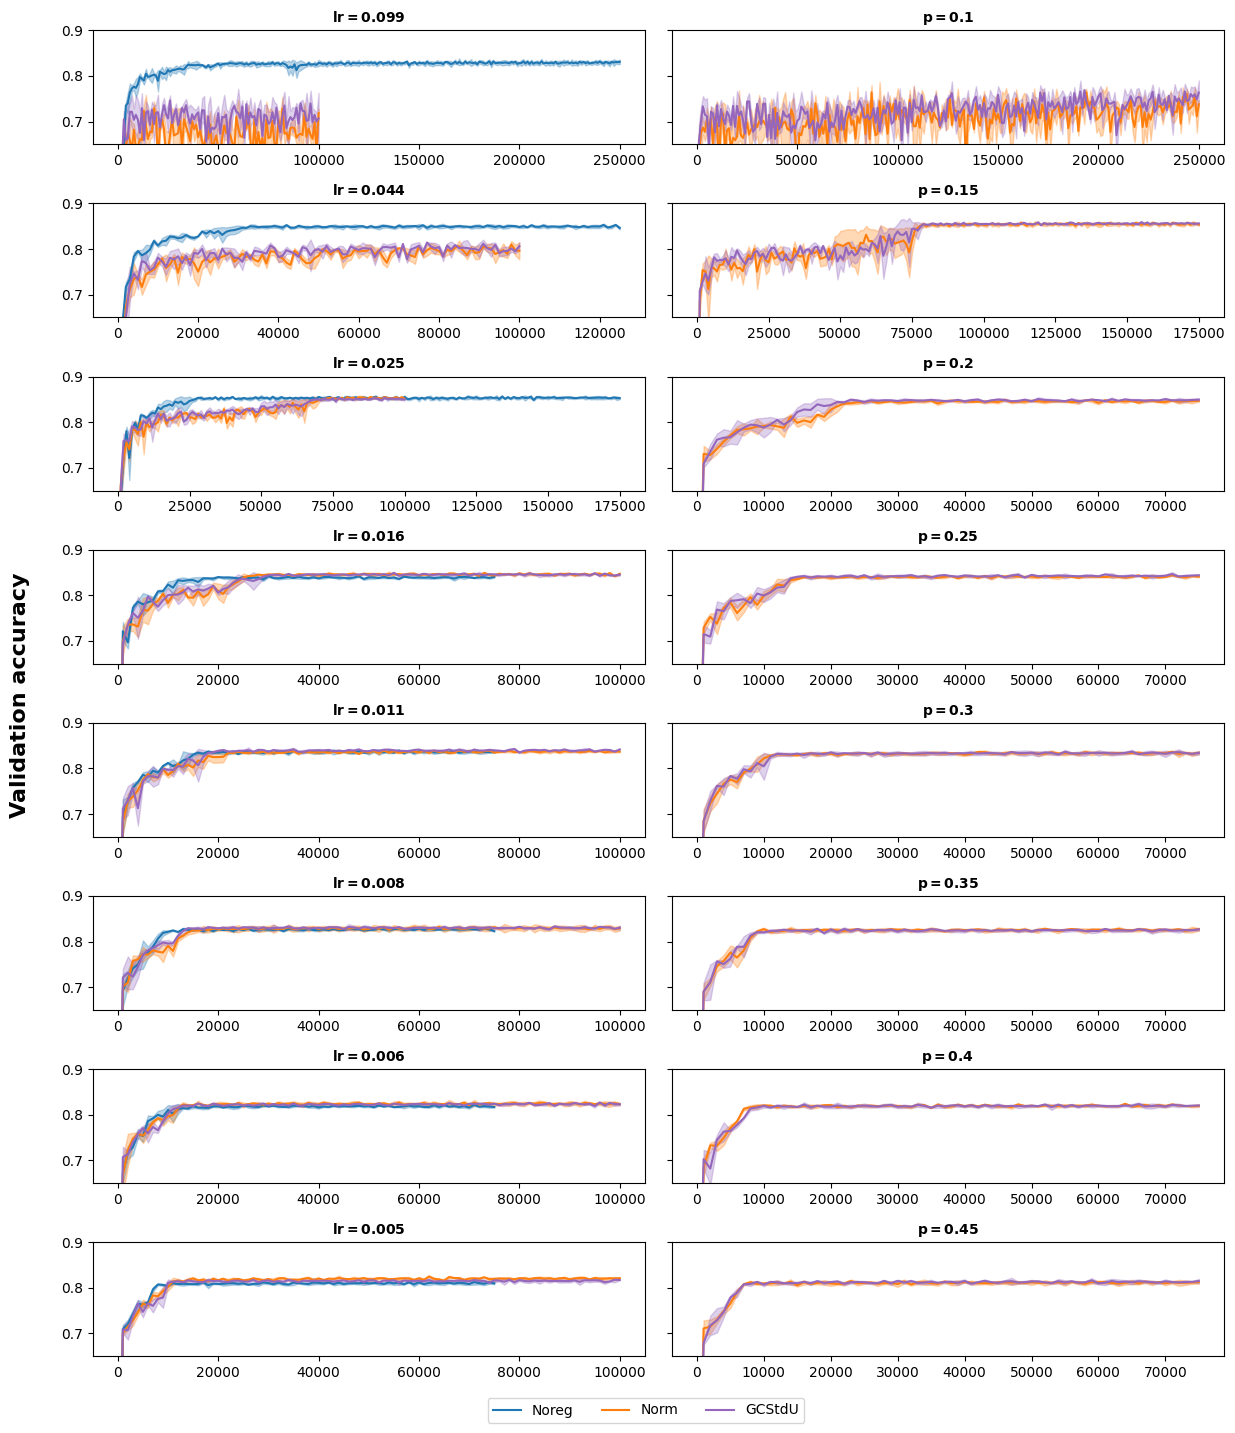

In [32]:
lrp = [("0.099","0.1"),("0.044","0.15"),("0.025","0.2"),("0.016","0.25"),("0.011","0.3"),("0.008","0.35"),("0.006","0.4"),("0.005","0.45")]

fig,axs = plt.subplots(ncols=2,nrows=len(lrp),sharey="all")

for i,(lr,p) in enumerate(lrp):
    stats = get_stats(f"{data_path}/noreg/{lr}","test_stats")
    plot_step_stat(stats["acc"],axs[i][0],label="Noreg",color=colors["noreg"])

    stats = get_stats(f"{data_path}/norm_p1/{lr}","test_stats")
    plot_step_stat(stats["acc"],axs[i][0],label="Norm",color=colors["norm"])

    stats = get_stats(f"{data_path}/gcstdu_p1/{lr}","test_stats")
    plot_step_stat(stats["acc"],axs[i][0],label="GCStdU",color=colors["gcstdu"])

    stats = get_stats(f"{data_path}/norm/{p}_1","test_stats")
    plot_step_stat(stats["acc"],axs[i][1],label="Norm",color=colors["norm"])

    stats = get_stats(f"{data_path}/gcstdu/{p}_1","test_stats")
    plot_step_stat(stats["acc"],axs[i][1],label="GCStdU",color=colors["gcstdu"])

    axs[i][0].set_title(fr"$\mathbf{{lr={lr}}}$",font={'weight' : 'bold'})
    axs[i][1].set_title(fr"$\mathbf{{p={p}}}$",font={'weight' : 'bold'})
    axs[i][1].set_ylim(0.65,0.9) 

fig.text(-0.03, 0.5, "Validation accuracy", va='center', rotation='vertical',font={'size'   : 16,'weight' : 'bold'})

lines, labels = axs[0][0].get_legend_handles_labels()
fig.legend(lines, labels, loc='lower center', ncol=len(labels), bbox_to_anchor=(0.5,-0.025), bbox_transform=fig.transFigure)
fig.set_size_inches(12,14)
fig.tight_layout()
fig.savefig("./images/noreg_norm_gcstdu_accuracy.png", bbox_inches='tight',dpi=300)

/home/miri/Documents/bachelorthesis/plots/plot_utils.py:608: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot({"x" : labels,"y" : mean},x = "x", y = "y",palette=colors,edgecolor="black",ax=axs[2])
/home/miri/Documents/bachelorthesis/plots/plot_utils.py:609: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[2].set_xticklabels(axs[2].get_xticklabels(),rotation=70)


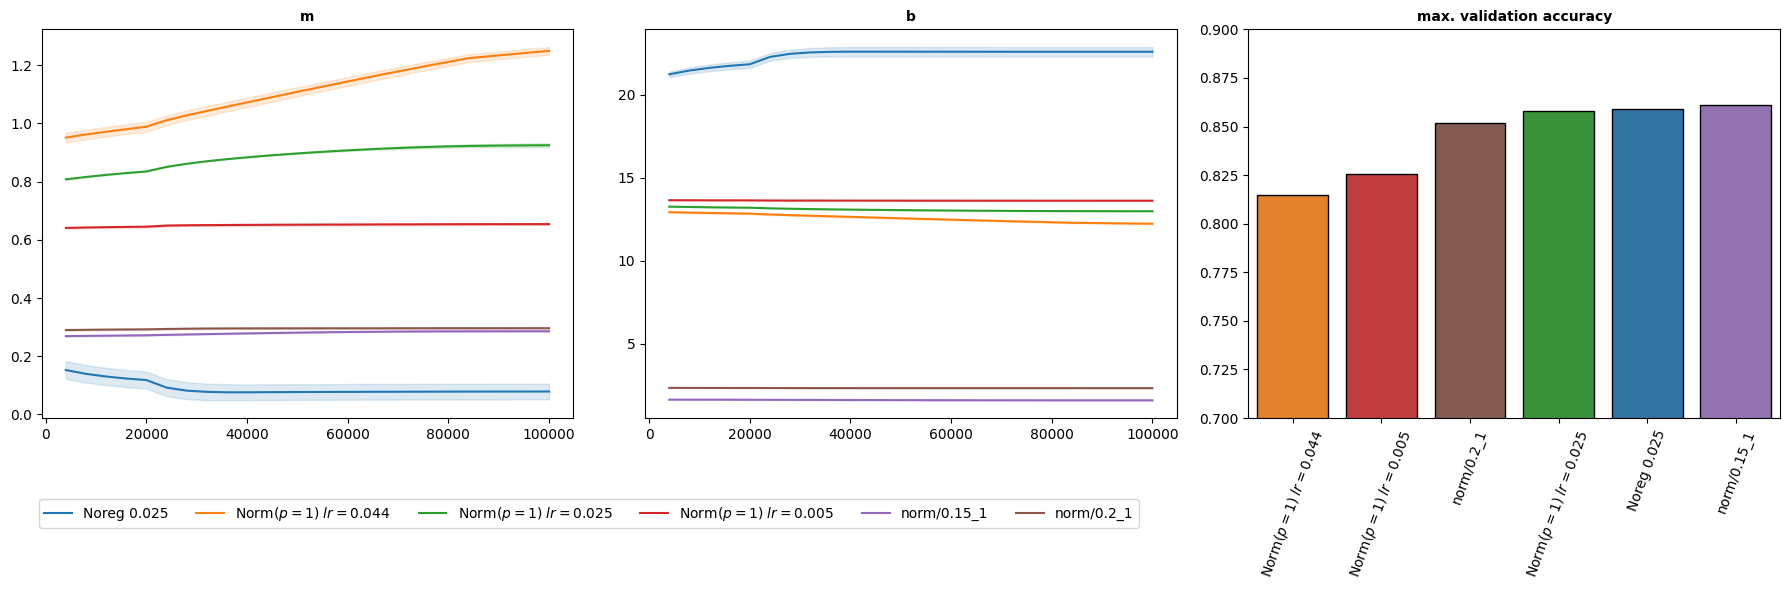

In [13]:
exps = ["noreg/0.025","norm_p1/0.044","norm_p1/0.025","norm_p1/0.005","norm/0.15_1","norm/0.2_1"]
labels = [r"Noreg 0.025",r"Norm($p=1$) $lr = 0.044$", r"Norm($p=1$) $lr = 0.025$", r"Norm($p=1$) $lr = 0.005$","norm/0.15_1","norm/0.2_1"]
colors = dict(zip(labels, sns.color_palette("tab10", len(labels))))
fig,axs = mg_spacing_and_bar_plot(data_path,exps,labels,colors,"mg_spacing_0","states")


/home/miri/Documents/bachelorthesis/plots/plot_utils.py:608: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot({"x" : labels,"y" : mean},x = "x", y = "y",palette=colors,edgecolor="black",ax=axs[2])
/home/miri/Documents/bachelorthesis/plots/plot_utils.py:609: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[2].set_xticklabels(axs[2].get_xticklabels(),rotation=70)


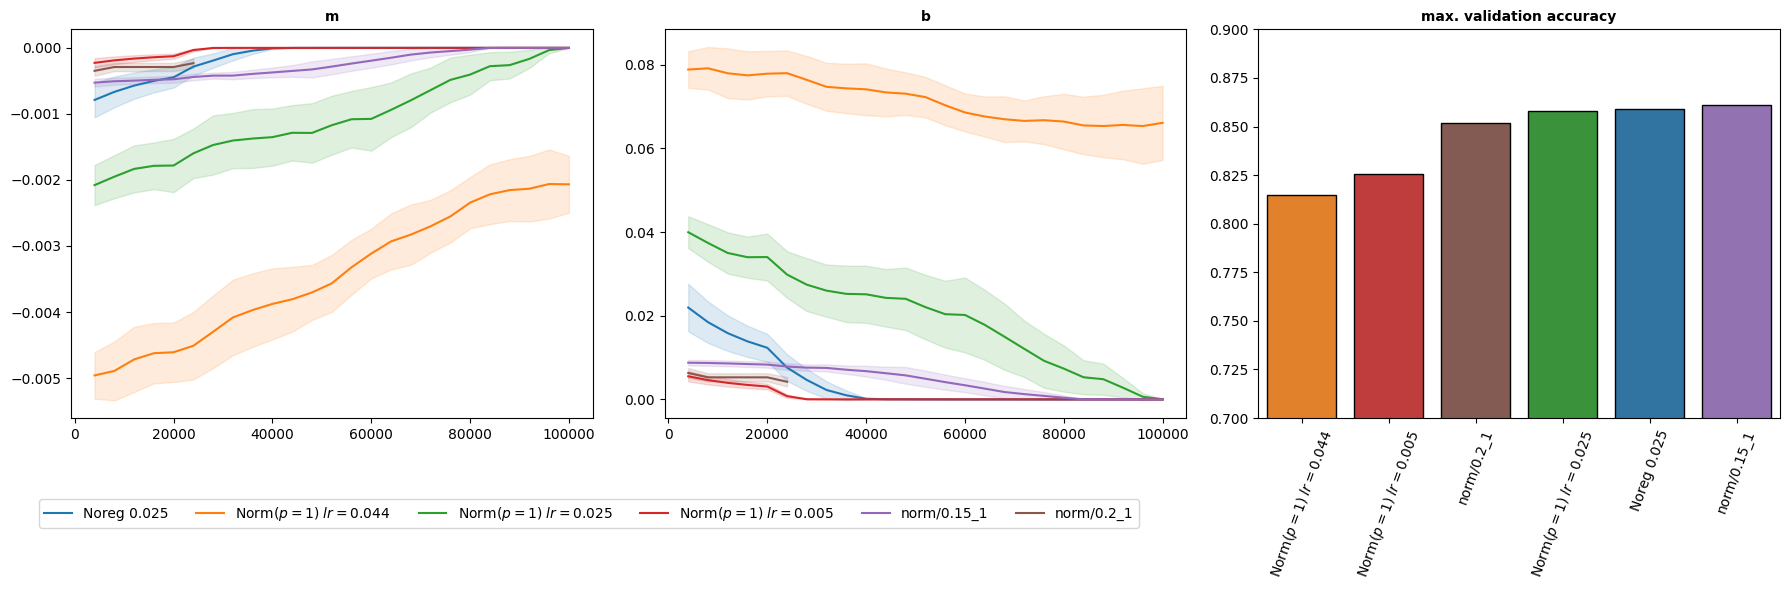

In [6]:
exps = ["noreg/0.025","norm_p1/0.044","norm_p1/0.025","norm_p1/0.005","norm/0.15_1","norm/0.2_1"]
labels = [r"Noreg 0.025",r"Norm($p=1$) $lr = 0.044$", r"Norm($p=1$) $lr = 0.025$", r"Norm($p=1$) $lr = 0.005$","norm/0.15_1","norm/0.2_1"]
colors = dict(zip(labels, sns.color_palette("tab10", len(labels))))
fig,axs = mg_spacing_and_bar_plot(data_path,exps,labels,colors,"mg_spacing_0","updates")


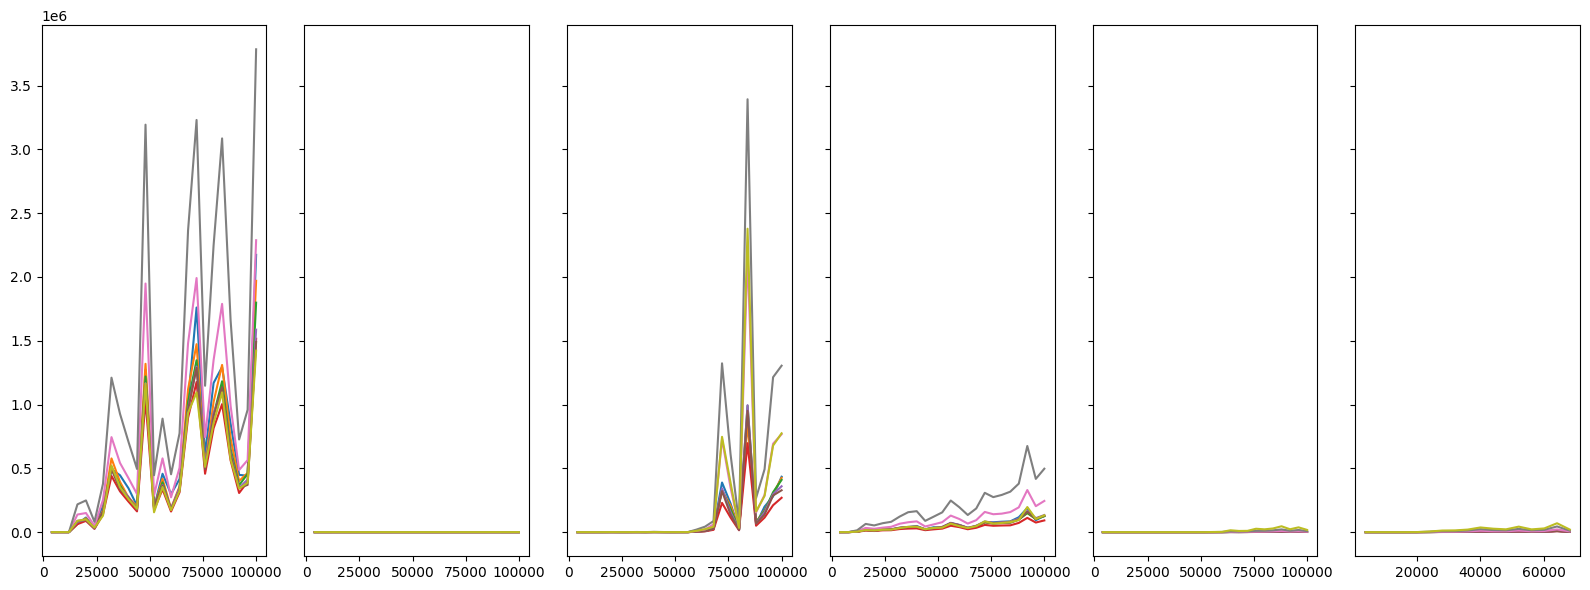

In [12]:
exps = ["noreg/0.025","norm_p1/0.044","norm_p1/0.025","norm_p1/0.005","norm/0.15_1","norm/0.2_1"]
labels = [r"Noreg 0.025",r"Norm($p=1$) $lr = 0.044$", r"Norm($p=1$) $lr = 0.025$", r"Norm($p=1$) $lr = 0.005$","norm/0.15_1","norm/0.2_1"]
colors = dict(zip(labels, sns.color_palette("tab10", len(labels))))
fig,axs = lars(data_path,exps,labels,colors,[0.025,0.044,0.044,0.005,0.001,0.001],"mg_spacing_0","grads")
fig.set_size_inches(16,6)
fig.tight_layout()

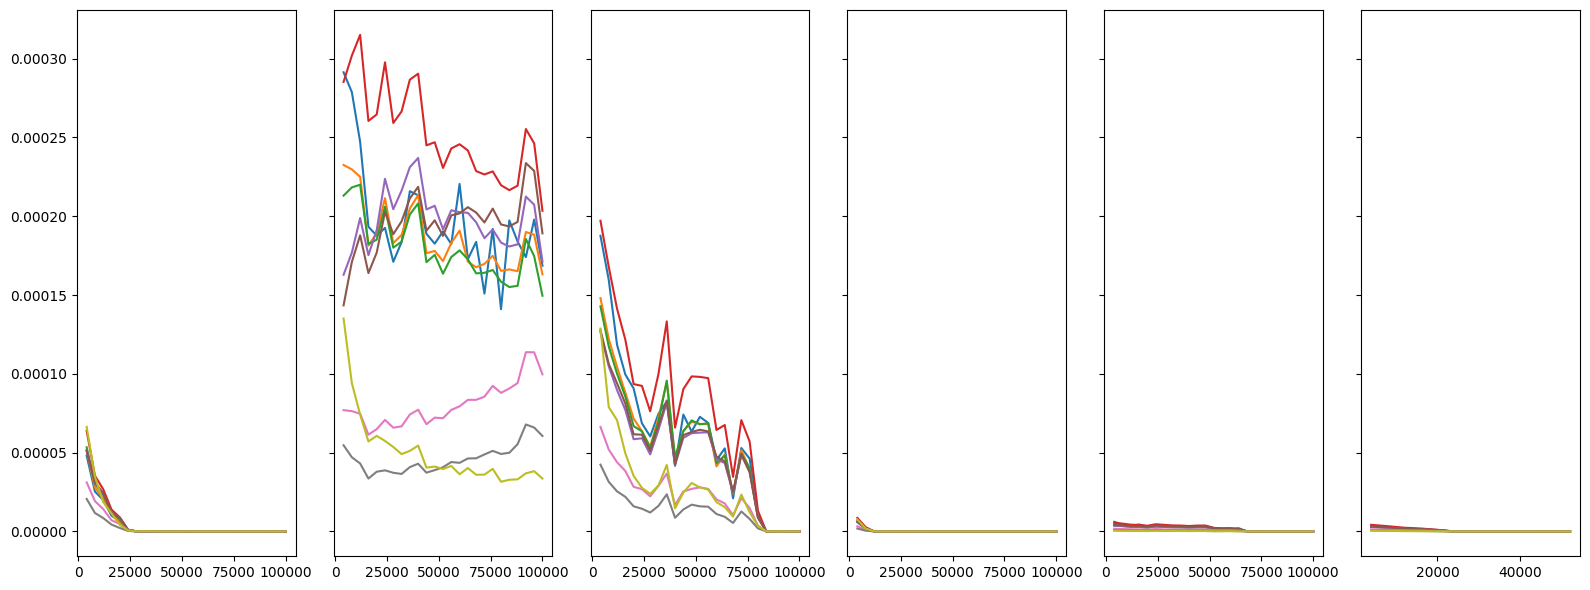

In [9]:
exps = ["noreg/0.025","norm_p1/0.044","norm_p1/0.025","norm_p1/0.005","norm/0.15_1","norm/0.2_1"]
labels = [r"Noreg 0.025",r"Norm($p=1$) $lr = 0.044$", r"Norm($p=1$) $lr = 0.025$", r"Norm($p=1$) $lr = 0.005$","norm/0.15_1","norm/0.2_1"]
colors = dict(zip(labels, sns.color_palette("tab10", len(labels))))
fig,axs = lars(data_path,exps,labels,colors,[0.025,0.044,0.044,0.005,0.001,0.001],"mg_spacing_0",)
fig.set_size_inches(16,6)
fig.tight_layout()

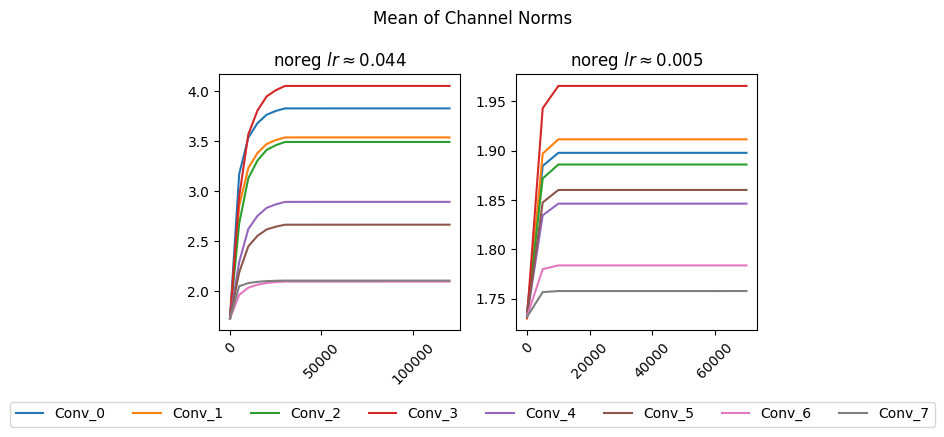

In [ ]:
fig,axs = plt.subplots(ncols = 2, nrows = 1)

plot_fn = lambda i : lambda d :  {0 :    {
                                i :  
                                ("Mean of output channel norms per layer", d["cnorm_mean"]) , 
                            }}


_ = plot_data(f"{data_path}/standard/0.044",plot_fn(0),start=0,axs_tuple=(fig,axs,2,1))
_ = plot_data(f"{data_path}/standard/0.005",plot_fn(1),start=0,axs_tuple=(fig,axs,2,1))

fig.set_size_inches(6,4)
fig.suptitle("Mean of Channel Norms")
axs[0].set_title(r"noreg $lr \approx 0.044$")
axs[1].set_title(r"noreg $lr \approx 0.005$")
axs[0].tick_params(axis='x', labelrotation=45)
axs[1].tick_params(axis='x', labelrotation=45)

lines, labels = axs[0].get_legend_handles_labels()
fig.legend(lines, labels, loc='lower center', ncol=len(labels), bbox_to_anchor=(0.5,-0.08), bbox_transform=fig.transFigure)
fig.tight_layout()
fig.savefig("./images/noreg_0.044_vs_noreg_0.005_cnorm_mean.png", bbox_inches='tight')
plt.show()


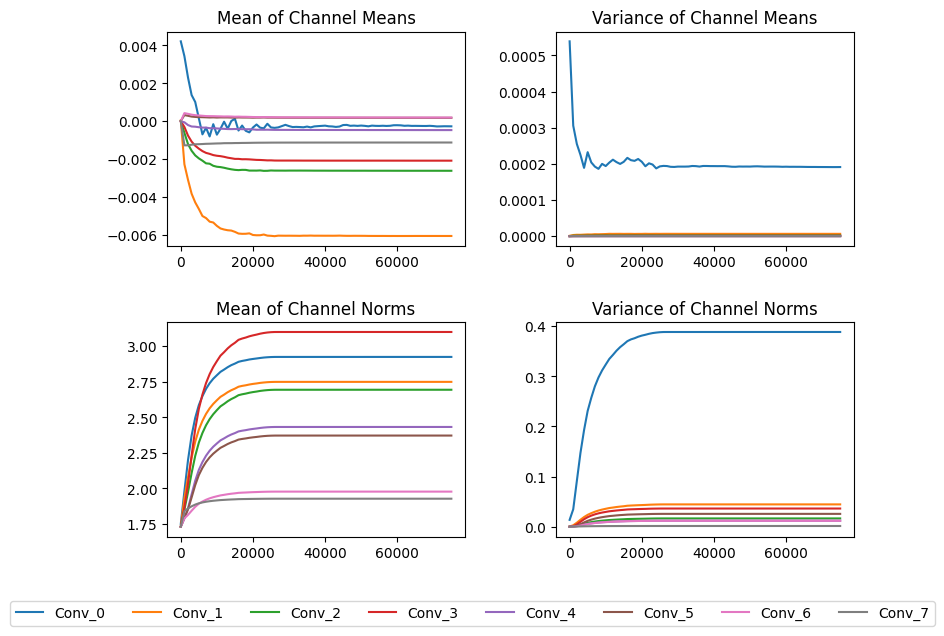

In [ ]:
fig,axs = plot_data(f"{data_path}/standard/0.025", lambda d :     
                    {0 :    {
                            0 :  
                                ("Mean of Channel Means", d["cmean_mean"]) , 
                            1 :  
                                ("Variance of Channel Means", d["cmean_var"]) 
                            },
                    1 :    {
                            0 :  
                                ("Mean of Channel Norms", d["cnorm_mean"]) , 
                            1 :  
                                ("Variance of Channel Norms", d["cnorm_var"]) 
                            }})

fig.tight_layout()
fig.set_size_inches(8,6)
lines, labels = axs[0][0].get_legend_handles_labels()

fig.legend(lines, labels, loc='lower center', ncol=len(labels), bbox_to_anchor=(0.5,-0.08), bbox_transform=fig.transFigure)
fig.savefig("./images/noreg_0.025_cmeans_cnorms.png", bbox_inches='tight')

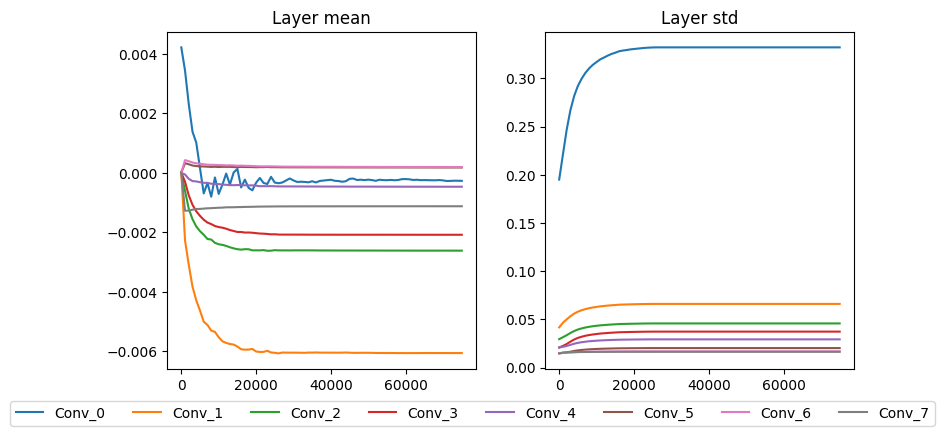

In [ ]:
fig,axs = plot_data(f"{data_path}/standard/0.025", lambda d :     
                    {0 :    {
                            0 :  
                                ("Layer mean", d["mean"]) , 
                            1 :  
                                ("Layer std", d["std"]) 
                            }})

fig.tight_layout()
fig.set_size_inches(8,4)
lines, labels = axs[0].get_legend_handles_labels()
fig.legend(lines, labels, loc='lower center', ncol=len(labels), bbox_to_anchor=(0.5,-0.08), bbox_transform=fig.transFigure)
fig.savefig("./images/noreg_0.025_lmean_lstd.png", bbox_inches='tight')

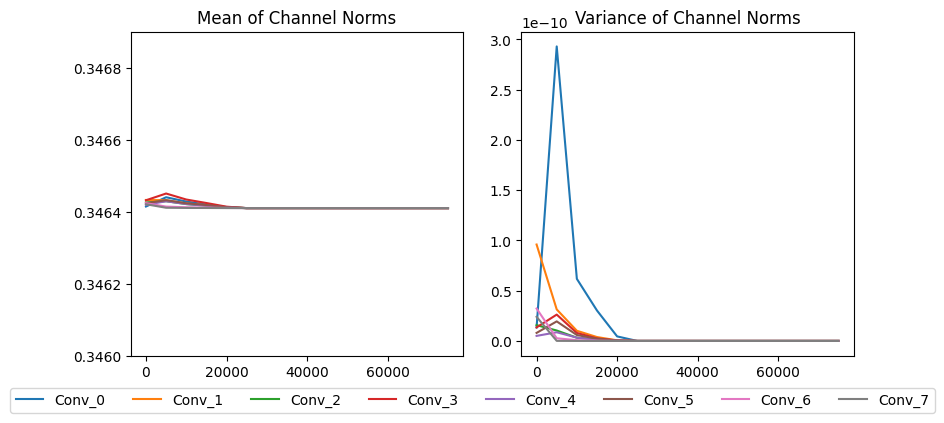

In [ ]:
fig,axs = plot_data(f"{data_path}/norm/0.2_1", lambda d :     
                    {0 :    {
                            0 :  
                                ("Mean of Channel Norms", d["cnorm_mean"]) , 
                            1 :  
                                ("Variance of Channel Norms", d["cnorm_var"]) 
                            }})

fig.tight_layout()
fig.set_size_inches(8,4)
lines, labels = axs[0].get_legend_handles_labels()
axs[0].set_ylim(0.346,0.3469)
fig.legend(lines, labels, loc='lower center', ncol=len(labels), bbox_to_anchor=(0.5,-0.08), bbox_transform=fig.transFigure)
fig.savefig("./images/norm_0.2_1_cnorms.png", bbox_inches='tight')

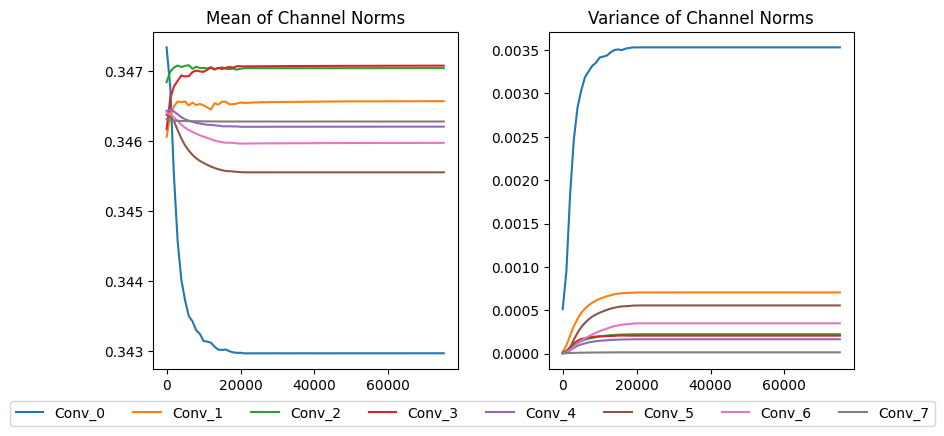

In [ ]:
fig,axs = plot_data(f"{data_path}/gcstdu/0.2_1", lambda d :     
                    {0 :    {
                            0 :  
                                ("Mean of Channel Norms", d["cnorm_mean"]) , 
                            1 :  
                                ("Variance of Channel Norms", d["cnorm_var"]) 
                            }})

fig.tight_layout()
fig.set_size_inches(8,4)
lines, labels = axs[0].get_legend_handles_labels()
fig.legend(lines, labels, loc='lower center', ncol=len(labels), bbox_to_anchor=(0.5,-0.08), bbox_transform=fig.transFigure)
fig.savefig("./images/gcstdu_0.2_1_cnorms.png", bbox_inches='tight')

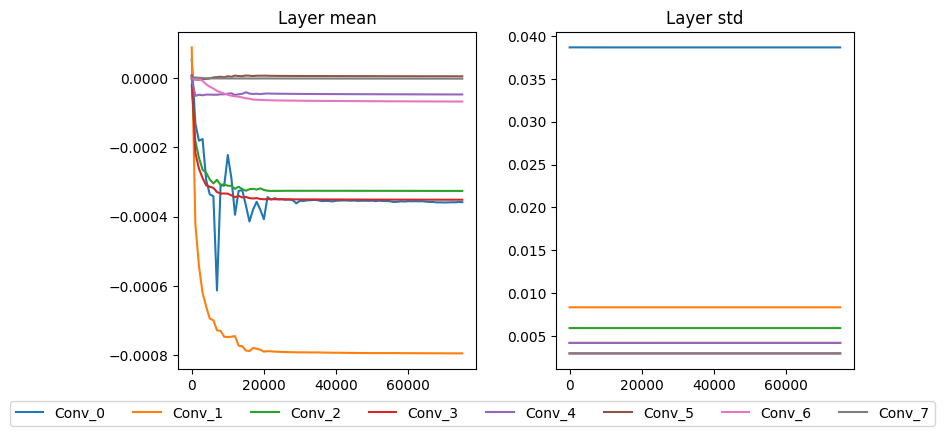

In [ ]:
fig,axs = plot_data(f"{data_path}/gcstdu/0.2_1", lambda d :     
                    {0 :    {
                            0 :  
                                ("Layer mean", d["mean"]) , 
                            1 :  
                                ("Layer std", d["std"]) 
                            }})

fig.tight_layout()
fig.set_size_inches(8,4)
lines, labels = axs[0].get_legend_handles_labels()
fig.legend(lines, labels, loc='lower center', ncol=len(labels), bbox_to_anchor=(0.5,-0.08), bbox_transform=fig.transFigure)
fig.savefig("./images/gcstdu_0.2_1_lmean_lstd.png", bbox_inches='tight')